### Viabilidade Financeira

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Base dados
df_base = pd.read_csv('/content/drive/MyDrive/Case Ifood/df_base_tratada.csv')

print(df_base.head())
print(df_base['grupo'].value_counts())

                                         customer_id    grupo  num_pedidos  \
0  755e1fa18f25caec5edffb188b13fd844b2af8cf5adedc...   target           19   
1  b821aa8372b8e5b82cdc283742757df8c45eecdd72adf4...  control            6   
2  d425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc0...  control           31   
3  6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c...   target           10   
4  dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f...  control            1   

   gasto_total  cliente_ativo  ticket_medio  fez_pedido  
0       229.00           True     12.052632        True  
1       287.88           True     47.980000        True  
2      2004.59           True     64.664194        True  
3       445.43           True     44.543000        True  
4        23.00           True     23.000000        True  
grupo
target     445925
control    360542
Name: count, dtype: int64


In [2]:
# Premissas
valor_cupom = 10

# Separar os grupos
df_target = df_base[df_base['grupo'] == 'target']
df_control = df_base[df_base['grupo'] == 'control']

###### Receita Incremental

In [3]:
# Receita incremental por usuário = gasto médio target - gasto médio control
gasto_medio_target = df_target['gasto_total'].mean()
gasto_medio_control = df_control['gasto_total'].mean()

delta_gasto_medio = gasto_medio_target - gasto_medio_control
num_usuarios_target = len(df_target)

receita_incremental = delta_gasto_medio * num_usuarios_target

print(f"Receita incremental por usuário: R$ {delta_gasto_medio:.2f}")
print(f"Receita incremental total: R$ {receita_incremental:,.2f}")


Receita incremental por usuário: R$ 26.08
Receita incremental total: R$ 11,630,928.80


###### Custo da Campanha

In [4]:
valor_cupom = 10
num_usuarios_target = df_target['customer_id'].nunique()
custo_total_campanha = num_usuarios_target * valor_cupom  # 1 cupom por usuário

print(f"Usuários no grupo target: {num_usuarios_target:,}")
print(f"Custo total estimado da campanha: R$ {custo_total_campanha:,.2f}")


Usuários no grupo target: 445,924
Custo total estimado da campanha: R$ 4,459,240.00


###### ROI da campanha

In [5]:
# ROI = (lucro liquido / custo da campanha)
lucro_liquido = receita_incremental - custo_total_campanha
roi = lucro_liquido / custo_total_campanha

print(f"Lucro líquido estimado: R$ {lucro_liquido:,.2f}")
print(f"ROI da campanha: {roi:.2%}")

Lucro líquido estimado: R$ 7,171,688.80
ROI da campanha: 160.83%


###### Custo vs. receita incremental

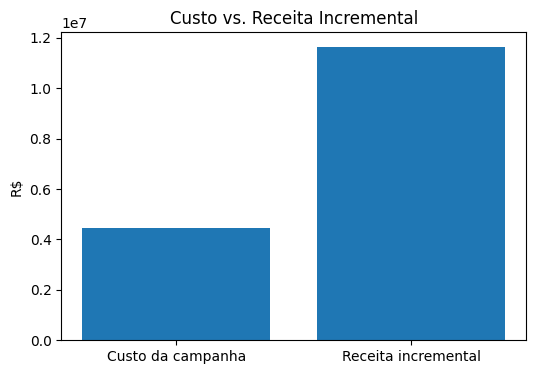

In [6]:
metrics = {
    'Custo da campanha': custo_total_campanha,
    'Receita incremental': receita_incremental
}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values())
plt.ylabel('R$')
plt.title('Custo vs. Receita Incremental')
plt.show()

Com base na premissa de que o cupom custa R$10 por pedido, estimamos que a campanha teve um custo de 4,459,240.00 reais.

Em contrapartida, os usuários do grupo que recebeu o cupom gastaram, em média, 26,08 reais a mais, o que gerou uma receita incremental total de 11.630.928,80 reais.

O ROI estimado da campanha foi de 160.83%, indicando que para cada 1 real investido, retornaram 2,61 em receita adicional.
